## Importing the relevant libraries

In [1]:
!pip install wget

  Preparing metadata (setup.py) ... - done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=b3400da788850bfb7393bba27919209a109aadeec80173062c1742b17ce0ee24
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
!pip install tensorflow==2.10.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 38.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, gc, wget
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from wordcloud import WordCloud
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
wget.download("https://raw.githubusercontent.com/yogawicaksana/helper_prabowo/main/helper_prabowo_ml.py",out="helper_prabowo_ml.py")
from helper_prabowo_ml import clean_html, punct, remove_digits, remove_links, remove_special_characters, remove_, removeStopWords, lower, email_address, non_ascii

2024-06-09 21:48:48.217773: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading the dataset

In [4]:
df = pd.read_csv('/kaggle/input/cyberbully-detection-dataset/cb_multi_labeled_balanced.csv')
df = df.sample(n=20000).reset_index(drop=True)
df.head()

,text,label
0,"@gnopercept ""Guys, I forgot to wind my watch--...",not_cyberbullying
1,10.4k likes....... oh you're all just plain st...,not_cyberbullying
2,"@dankmtl Again, idiot, none of that changes th...",religion
3,"Damn, it's his fucking chance. Answer, bitch. ...",gender/sexual
4,@Yunggv3 “Attention seeking ass bitch”,gender/sexual


## Data Exploration

In [5]:
df.shape

(20000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20000 non-null  object
 1   label   20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [7]:
df.describe()

,text,label
count,20000,20000
unique,20000,4
top,Another's stupid opinion 😂😂 https://t.co/zwc56...,not_cyberbullying
freq,1,10012


In [8]:
df.isna().sum()

text     0
label    0
dtype: int64

## Exploratory Data Analysis (EDA)

In [9]:
df['num_words'] = df['text'].apply(len)
df['num_words'].describe()

count    20000.000000
mean       127.986950
std         80.710705
min          5.000000
25%         64.000000
50%        104.000000
75%        174.000000
max        918.000000
Name: num_words, dtype: float64

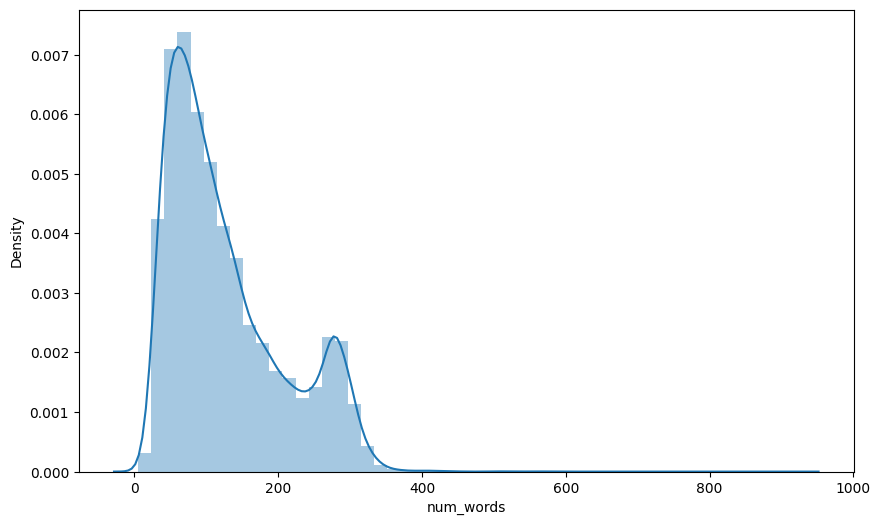

In [10]:
plt.figure(figsize=(10,6),dpi=100)
fig = sns.distplot(df['num_words'])
plt.show(fig)
del fig
plt.close('all')
gc.collect();

In [11]:
max_length = 85

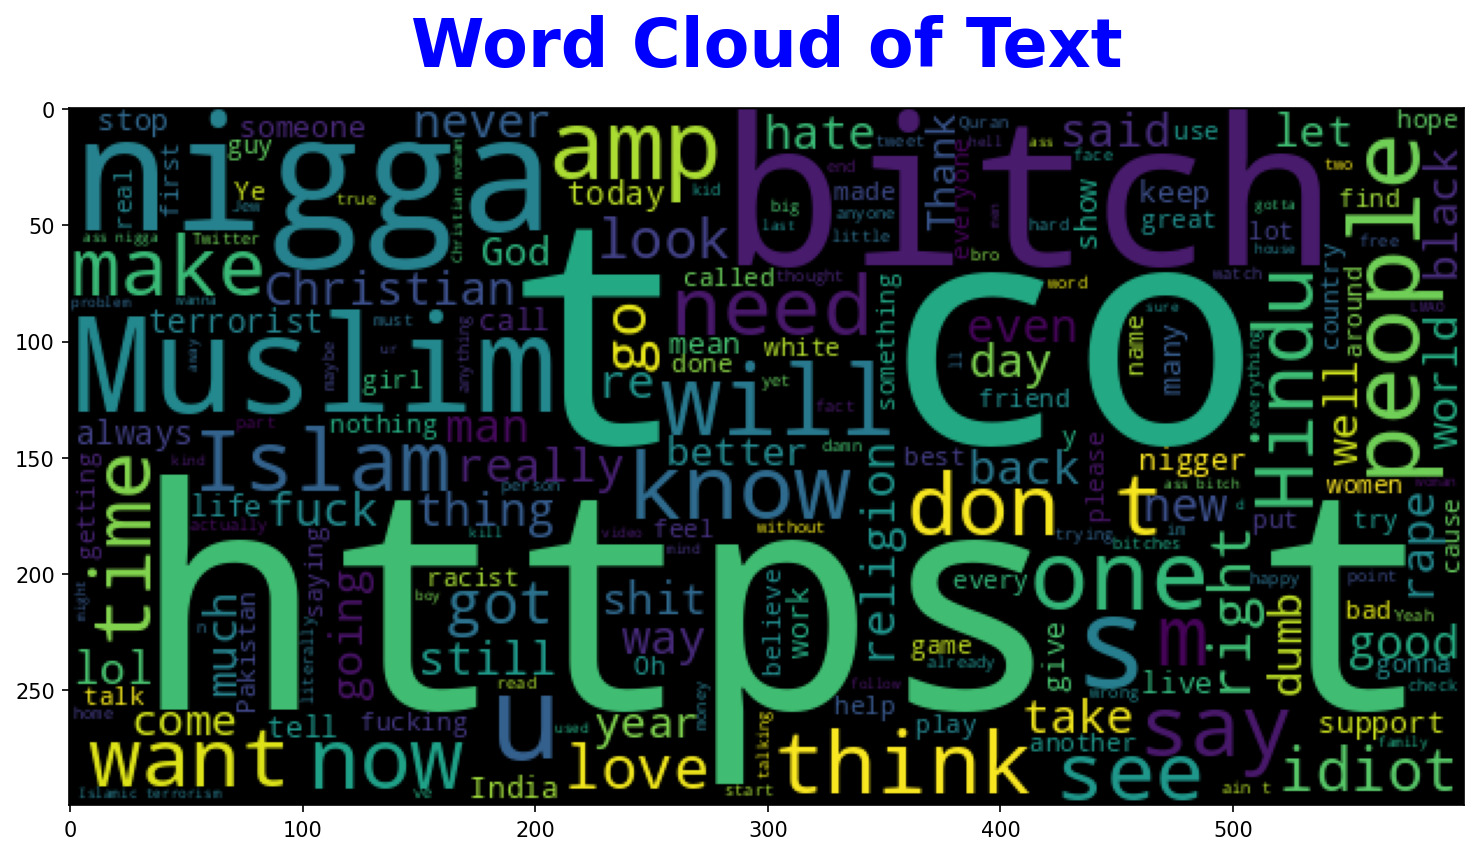

In [12]:
plt.figure(figsize=(12,8),dpi=150)
wc = WordCloud(width=600,height=300,random_state=101).generate(' '.join(df.text))
plt.title('Word Cloud of Text',color='blue',fontsize=32,fontweight='bold',pad=20)
plt.imshow(wc);

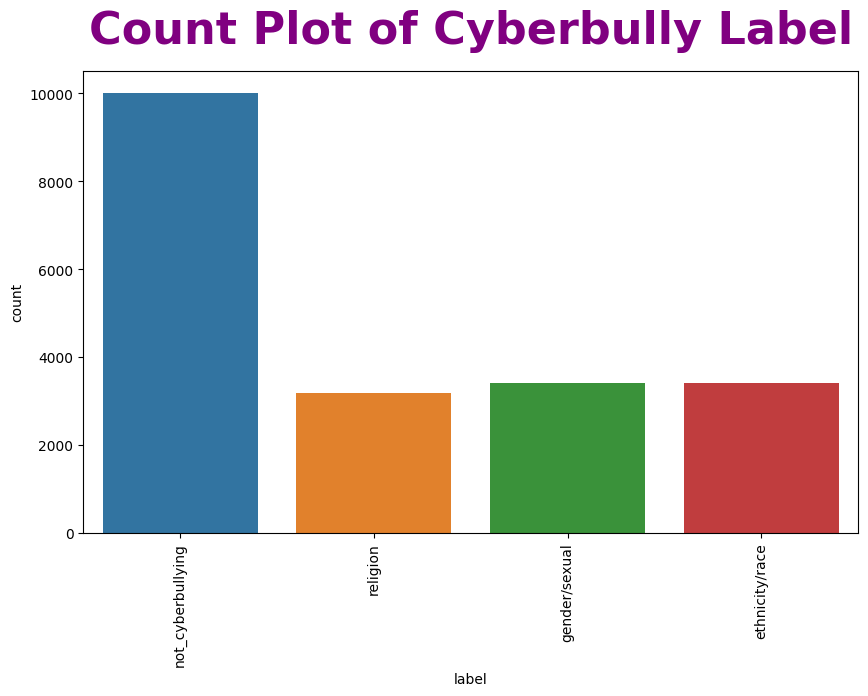

In [13]:
plt.figure(figsize=(10,6))
fig = sns.countplot(data=df,x='label')
plt.title('Count Plot of Cyberbully Label',fontsize=32,pad=20,color='purple',fontweight='bold')
plt.xticks(rotation=90)
plt.show(fig)
del fig
plt.close('all')
gc.collect();

It is clearly evident from the above plot that there is a huge imbalance in the cyberbullying labels with "notcyberbullying" being the majority class. 

## Text Preprocessing

In [14]:
def clean_text(data,col):
    data[col] = data[col].apply(func=remove_)
    data[col] = data[col].apply(func=remove_digits)
    data[col] = data[col].apply(func=remove_links)
    data[col] = data[col].apply(func=remove_special_characters)
    data[col] = data[col].apply(func=removeStopWords)
    data[col] = data[col].apply(func=punct)
    data[col] = data[col].apply(func=email_address)
    data[col] = data[col].apply(func=non_ascii)
    data[col] = data[col].apply(func=clean_html)
    data[col] = data[col].apply(func=lower)
    return data

In [15]:
preprocessed_df = clean_text(df,'text')
preprocessed_df.head()

,text,label,num_words
0,gnopercept guys forgot wind watchi need block ...,not_cyberbullying,122
1,k likes oh plain stupid,not_cyberbullying,74
2,dankmtl again idiot none changes ratio muslims...,religion,134
3,damn fucking chance answer bitch wwoww wwould ...,gender/sexual,207
4,yunggv attention seeking ass bitch,gender/sexual,38


## Downloading the Tokenizer and the pretrained transformer model from Hugging Face

In [16]:
tokenizer = AutoTokenizer.from_pretrained('sreeniketh/cyberbullying_sentiment_dsce_2023')
distilbert = TFAutoModelForSequenceClassification.from_pretrained('sreeniketh/cyberbullying_sentiment_dsce_2023',from_pt=True)

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/923 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


## Splitting the preprocessed dataset into training and test sets

In [17]:
train_df, test_df = train_test_split(preprocessed_df,test_size=0.3,random_state=101)

## Text Tokenization

In [18]:
X_train = tokenizer(text=train_df['text'].tolist(),
                   max_length=max_length,
                   padding=True,
                   truncation=True,
                   add_special_tokens=True,
                   return_tensors='tf',
                   return_attention_mask=True,
                   return_token_type_ids=False,
                   verbose=1)

X_test = tokenizer(text=test_df['text'].tolist(),
                  max_length=max_length,
                  padding=True,
                  truncation=True,
                  add_special_tokens=True,
                  return_tensors='tf',
                  return_attention_mask=True,
                  return_token_type_ids=False,
                  verbose=1)

## Encoding the target label classes

In [19]:
encoder = LabelEncoder()
train_df.label = encoder.fit_transform(train_df.label)
test_df.label = encoder.transform(test_df.label)

In [20]:
encoded_labels = dict()

for idx, label in enumerate(encoder.classes_):
    encoded_labels[idx] = label

encoded_labels

{0: 'ethnicity/race',
 1: 'gender/sexual',
 2: 'not_cyberbullying',
 3: 'religion'}

## Defining the model architecture

In [21]:
input_ids = Input(shape=(max_length,),name='input_ids',dtype=tf.int32)
attention_mask = Input(shape=(max_length,),name='attention_mask',dtype=tf.int32)

In [22]:
embeddings = distilbert(input_ids,attention_mask=attention_mask)[0] # 0 -> final hidden state output, 1 -> pooling output

output = Flatten()(embeddings)
output = Dense(units=128,activation='relu')(output)
output = BatchNormalization()(output)
output = Dropout(0.3)(output)
output = Dense(units=64,activation='relu')(output)
output = BatchNormalization()(output)
output = Dropout(0.2)(output)
output = Dense(units=32,activation='relu')(output)
output = BatchNormalization()(output)
output = Dropout(0.1)(output)
output = Dense(units=4,activation='softmax')(output)

model = Model(inputs=[input_ids,attention_mask],outputs=output)
model.layers[2].trainable = True
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 85)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 85)]         0           []                               
                                                                                                  
 tf_distil_bert_for_sequence_cl  TFSequenceClassifie  66958086   ['input_ids[0][0]',              
 assification (TFDistilBertForS  rOutput(loss=None,               'attention_mask[0][0]']         
 equenceClassification)         logits=(None, 6),                                                 
                                 hidden_states=None                                           

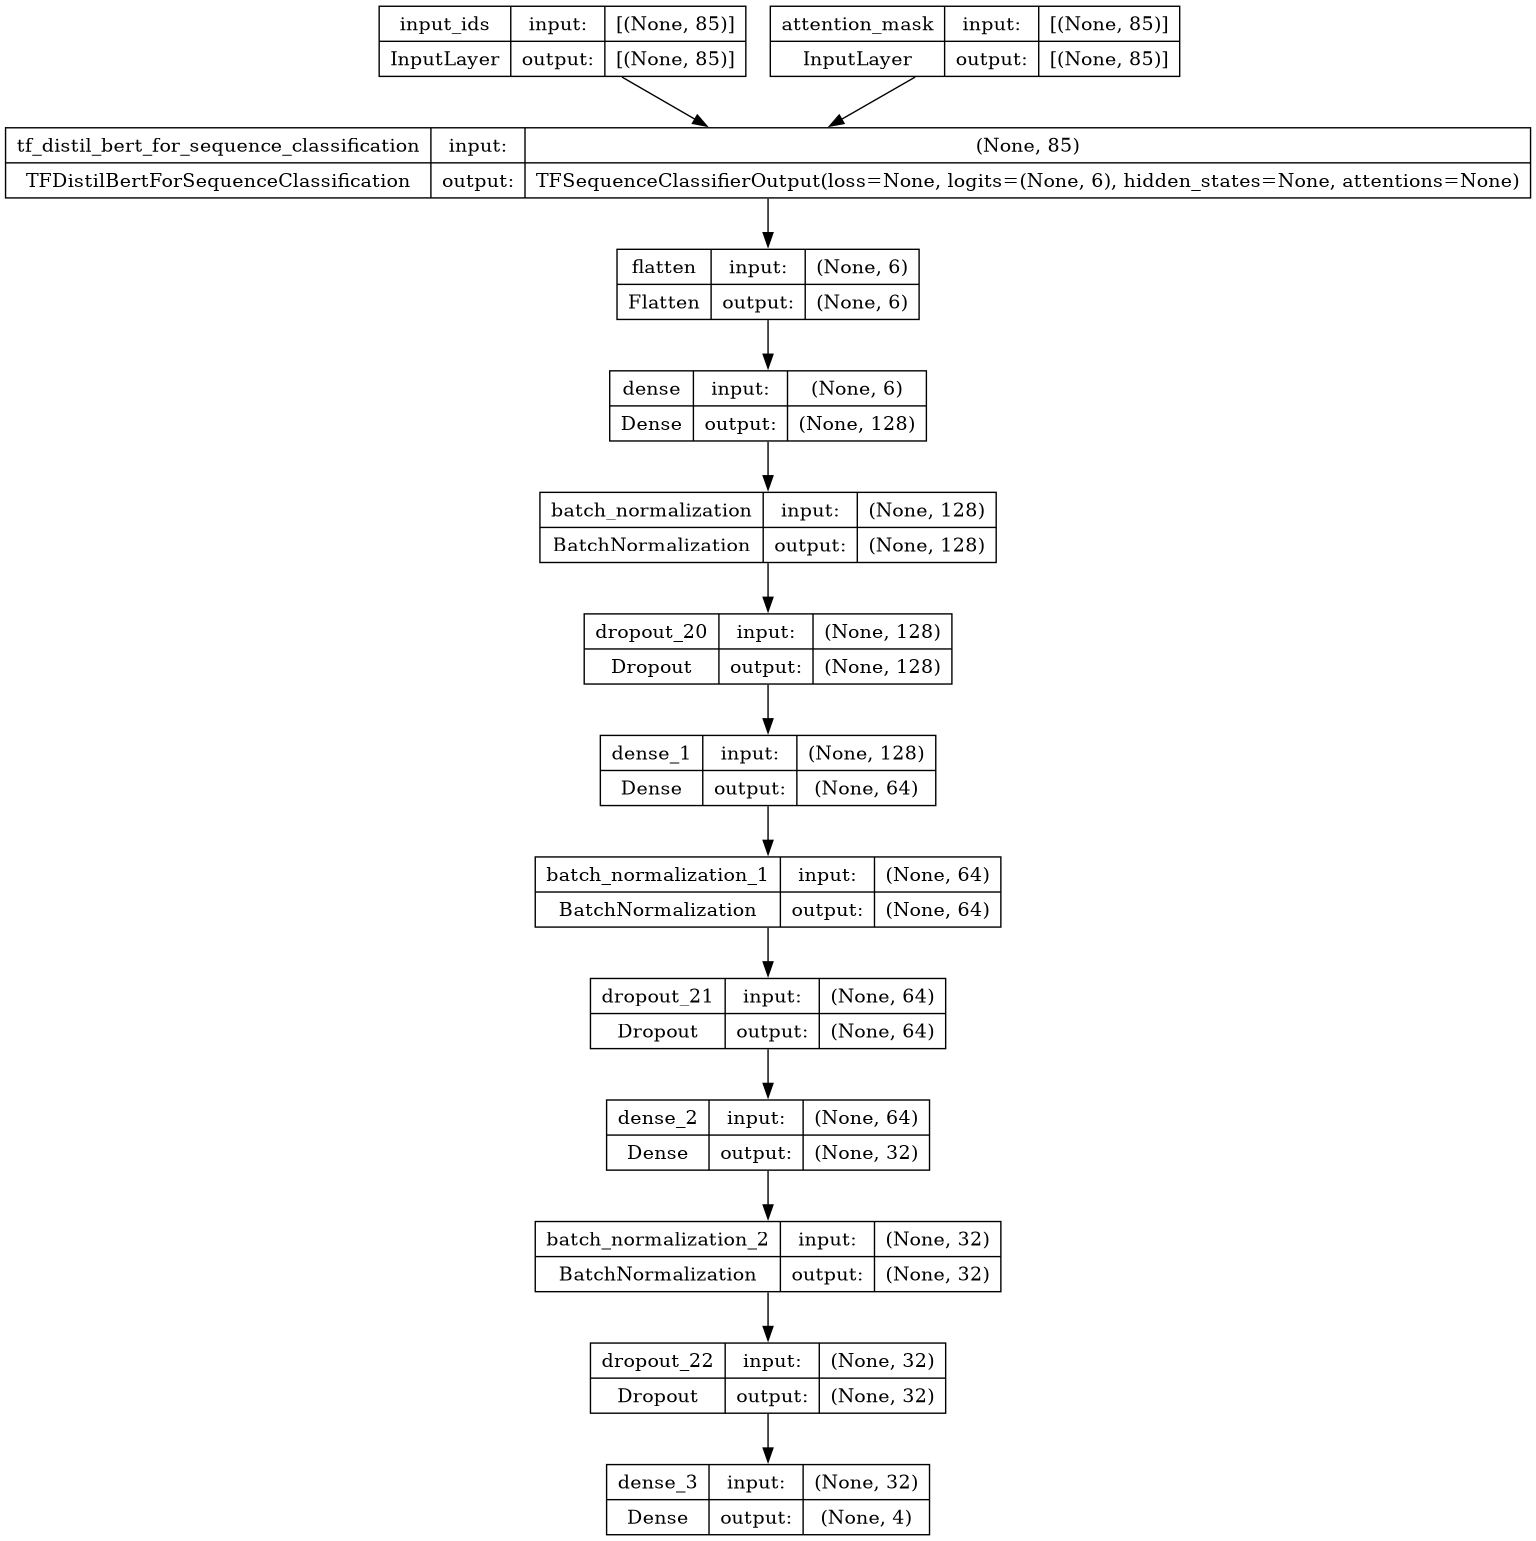

In [23]:
plot_model(model,to_file='model.png',show_shapes=True,dpi=100)

In [24]:
encoded_labels

{0: 'ethnicity/race',
 1: 'gender/sexual',
 2: 'not_cyberbullying',
 3: 'religion'}

In [25]:
adam = Adam(learning_rate=5e-5,epsilon=2e-7,decay=0.01,clipnorm=1.0)
class_weights = {0: 0.3, 1: 0.25, 2: 0.15, 3: 0.3}
model.compile(loss='sparse_categorical_crossentropy',optimizer=adam,metrics=SparseCategoricalAccuracy())

## Model Training

In [26]:
def time_based_decay(epoch, lr):
    decay_rate = 1e-5
    decay_epoch = 10
    return lr * (1 / (1 + decay_rate * epoch / decay_epoch))

es = EarlyStopping(monitor='val_sparse_categorical_accuracy',mode='max',patience=5,restore_best_weights=True,verbose=1)
ls = LearningRateScheduler(time_based_decay,verbose=1)
mc = ModelCheckpoint(filepath='cyberbullying_classifier.keras',monitor='val_sparse_categorical_accuracy',save_best_only=True,mode='max',verbose=1)

r = model.fit(x={'input_ids': X_train['input_ids'], 'attention_mask': X_train['attention_mask']},
              y=train_df.label,
              batch_size=256,
              epochs=15,
              class_weight=class_weights,
              validation_data=({'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']},test_df.label),
              callbacks=[es,ls,mc]
             )


Epoch 1: LearningRateScheduler setting learning rate to 4.999999873689376e-05.
Epoch 1/15
55/55 [==============================] - ETA: 0s - loss: 0.2082 - sparse_categorical_accuracy: 0.6108 
Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.66483, saving model to cyberbullying_classifier.keras
55/55 [==============================] - 2464s 45s/step - loss: 0.2082 - sparse_categorical_accuracy: 0.6108 - val_loss: 1.1797 - val_sparse_categorical_accuracy: 0.6648 - lr: 5.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 4.9999948736945024e-05.
Epoch 2/15
55/55 [==============================] - ETA: 0s - loss: 0.1107 - sparse_categorical_accuracy: 0.8149 
Epoch 2: val_sparse_categorical_accuracy improved from 0.66483 to 0.81717, saving model to cyberbullying_classifier.keras
55/55 [==============================] - 2485s 45s/step - loss: 0.1107 - sparse_categorical_accuracy: 0.8149 - val_loss: 0.9854 - val_sparse_categorical_accuracy: 0.8172 - lr: 5.0000e

## Visualizing the model performance

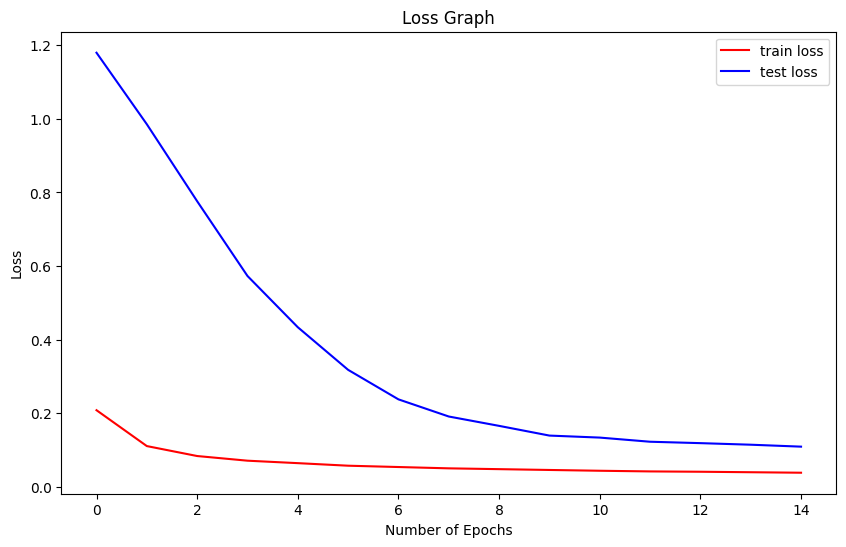

In [27]:
plt.figure(figsize=(10,6))
plt.plot(r.history['loss'],'r',label='train loss')
plt.plot(r.history['val_loss'],'b',label='test loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend();

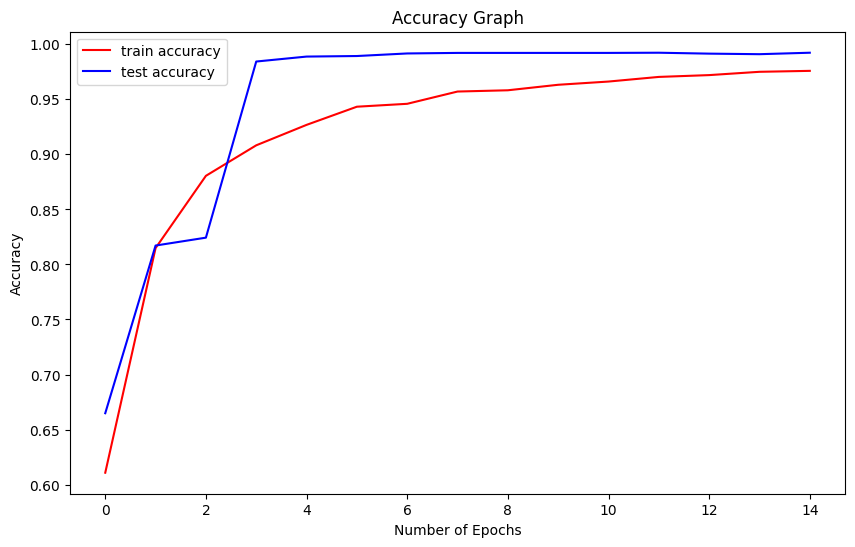

In [28]:
plt.figure(figsize=(10,6))
plt.plot(r.history['sparse_categorical_accuracy'],'r',label='train accuracy')
plt.plot(r.history['val_sparse_categorical_accuracy'],'b',label='test accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend();

## Evaluating the model on the test set

In [29]:
loss, acc = model.evaluate({'input_ids': X_test['input_ids'],'attention_mask': X_test['attention_mask']},test_df.label)
print("Sparse Categorical Crossentropy Loss:", round(loss,2))
print("Sparse Categorical Accuracy:", round(acc*100,2))

188/188 [==============================] - 252s 1s/step - loss: 0.1092 - sparse_categorical_accuracy: 0.9923
Sparse Categorical Crossentropy Loss: 0.11
Sparse Categorical Accuracy: 99.23


188/188 [==============================] - 257s 1s/step
Confusion Matrix:
[[1024    2    5    2]
 [  12 1020    3    2]
 [   3    1 2994    7]
 [   2    0    7  916]]
--------------------------------------------------------------------------------


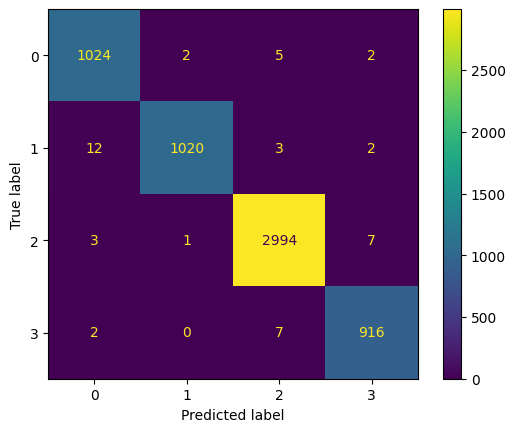

--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1033
           1       1.00      0.98      0.99      1037
           2       1.00      1.00      1.00      3005
           3       0.99      0.99      0.99       925

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000

--------------------------------------------------------------------------------


In [30]:
test_predictions = model.predict({'input_ids': X_test['input_ids'],'attention_mask': X_test['attention_mask']})
test_predictions = np.argmax(test_predictions,axis=1)
print("Confusion Matrix:")
print(confusion_matrix(test_df.label,test_predictions))
print("--"*40)
ConfusionMatrixDisplay.from_predictions(test_df.label,test_predictions)
plt.show()
print("--"*40)
print("Classification Report:")
print(classification_report(test_df.label,test_predictions))
print("--"*40)

Bravo! The model has performed incredibly well on the test set by achieving an outstanding accuracy of 99%. 

Don't forget to upvote my notebook if you liked it! If you have any feedback, feel free to share it in the comments.